In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics , preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [45]:
df = pd.read_csv('credit.csv')
print(df.dtypes)
print(df.columns)


CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
  

In [38]:
x = df.values[:,1:]

In [39]:

clus_data = preprocessing.StandardScaler().fit_transform(x)
clus_data = np.nan_to_num(clus_data)

In [54]:
k_means = KMeans(init='k-means++',n_clusters=3,n_init=12)
k_means.fit(clus_data)
labels = k_means.labels_

In [55]:
df['clus_num'] = labels
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clus_num
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [56]:
numeric_cols = df.select_dtypes(include=['number']).columns
df.groupby('clus_num')[numeric_cols].mean()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clus_num
clus_num,,,,,,,,,,,,,,,,,,
0,803.135706,0.835292,505.301746,252.926900,252.695487,329.605613,0.464871,0.132173,0.345017,0.068253,1.209572,8.653545,3271.732329,909.956446,544.110223,0.155673,11.479909,0.0
1,2228.855587,0.981522,4262.423360,2712.914822,1549.993191,460.507233,0.949216,0.667489,0.744732,0.063332,1.535541,56.442649,7734.612278,4148.026083,1252.939821,0.297908,11.923263,1.0
2,3978.572138,0.957732,382.607453,248.621031,134.064201,3882.354049,0.231175,0.110994,0.143109,0.448609,12.434591,5.534591,6678.682104,3022.407437,1752.483123,0.033902,11.345283,2.0


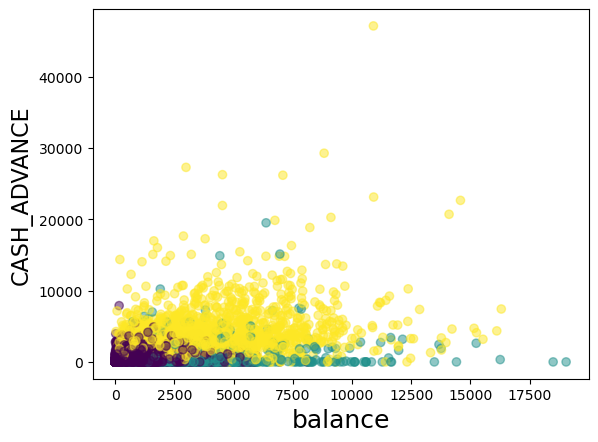

In [62]:
# Corrected code
# Assuming df is a pandas DataFrame
area = np.pi * (df.iloc[:, 11])**2  # Use df.iloc for integer-based indexing in pandas

# For scatter plot, use proper pandas indexing
plt.scatter(df.iloc[:, 1], df.iloc[:, 6], c=labels.astype(np.float64), alpha=0.5)
# Alternative: If you know column names, use df['column_name'] instead of df.iloc[:, index]

plt.xlabel('balance', fontsize=18)
plt.ylabel('CASH_ADVANCE', fontsize=16)  # Removed extra tabs

plt.show()